<a href="https://colab.research.google.com/github/gabimendess/Detec-odefraude_mba/blob/main/TCC_mba.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importando PANDA 



In [ ]:
import pandas as pd


#Importando dados CSV - Tabela Fraude dataset

In [ ]:
df = pd.read_csv('/content/fraud_dataset_example.csv')
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
101608,10,PAYMENT,7477.02,C513257306,785.00,0.00,M524833426,0.00,0.00,0,0
101609,10,CASH_OUT,282252.35,C210473293,220339.29,0.00,C1172042998,95156.01,91286.97,0,0
101610,10,PAYMENT,17289.01,C807582280,0.00,0.00,M334249577,0.00,0.00,0,0
101611,10,TRANSFER,1347146.45,C1315779140,1605.00,0.00,C1631408038,541639.43,2186953.43,0,0


In [ ]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [ ]:
df = df[['isFraud',
       'isFlaggedFraud', 'step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest']]
df.head()

,isFraud,isFlaggedFraud,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest
0,0,0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0
1,0,0,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0
2,1,0,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0
3,1,0,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0
4,0,0,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0


#Alterando nomes 

In [ ]:
colunas = {
    'isFraud': 'Fraude',
    'isFlaggedFraud':'Alerta_fraude',
    'step':'Tempo',
    'type':'Tipo',
    'amount':'Valor',
    'nameOrig':'Cliente_Origem',
    'oldbalanceOrg':'Saldo_inicial_co',
    'newbalanceOrig':'Novo_saldo_co',
    'nameDest':'cliente_Destino',
    'oldbalanceDest':'Saldo_inicial_cd',
    'newbalanceDest':'Novo_saldo_cd',
}

In [ ]:
df = df.rename(columns = colunas)
df.head()

,Fraude,Alerta_fraude,Tempo,Tipo,Valor,Cliente_Origem,Saldo_inicial_co,Novo_saldo_co,cliente_Destino,Saldo_inicial_cd,Novo_saldo_cd
0,0,0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0
1,0,0,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0
2,1,0,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0
3,1,0,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0
4,0,0,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0


#Descrição

In [ ]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Fraude,101613.0,1.141586e-03,3.376824e-02,0.00,0.00,0.00,0.00,1.00
Alerta_fraude,101613.0,0.000000e+00,0.000000e+00,0.00,0.00,0.00,0.00,0.00
Tempo,101613.0,8.523457e+00,1.820681e+00,1.00,8.00,9.00,10.00,10.00
Valor,101613.0,1.740901e+05,3.450199e+05,0.32,10016.59,53385.41,212498.40,10000000.00
Saldo_inicial_co,101613.0,9.071753e+05,2.829575e+06,0.00,0.00,20190.47,194715.00,38939424.03
Novo_saldo_co,101613.0,9.234992e+05,2.867319e+06,0.00,0.00,0.00,219217.76,38946233.02
Saldo_inicial_cd,101613.0,8.810428e+05,2.399949e+06,0.00,0.00,21058.00,591921.70,34008736.98
Novo_saldo_cd,101613.0,1.183998e+06,2.797761e+06,0.00,0.00,51783.43,1063121.64,38946233.02


In [ ]:
df.shape 


(101613, 11)

#Informações 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101613 entries, 0 to 101612
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Fraude            101613 non-null  int64  
 1   Alerta_fraude     101613 non-null  int64  
 2   Tempo             101613 non-null  int64  
 3   Tipo              101613 non-null  object 
 4   Valor             101613 non-null  float64
 5   Cliente_Origem    101613 non-null  object 
 6   Saldo_inicial_co  101613 non-null  float64
 7   Novo_saldo_co     101613 non-null  float64
 8   cliente_Destino   101613 non-null  object 
 9   Saldo_inicial_cd  101613 non-null  float64
 10  Novo_saldo_cd     101613 non-null  float64
dtypes: float64(5), int64(3), object(3)
memory usage: 8.5+ MB


In [ ]:
df.groupby('Fraude').Tempo.count()

Fraude
0    101497
1       116
Name: Tempo, dtype: int64

In [ ]:
df.isnull().values.any()

False

# Instalando pandas_profiling

In [ ]:
!pip install pandas-profiling==3.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#pandas_profiling

In [ ]:
import pandas_profiling

pandas_profiling.ProfileReport(df)

#Transformar váriavel TIPO em Dummy (binário 1 ou 0)

In [ ]:
df = pd.get_dummies(data=df, columns=['Tipo'])
df.head()


,Fraude,Alerta_fraude,Tempo,Valor,Cliente_Origem,Saldo_inicial_co,Novo_saldo_co,cliente_Destino,Saldo_inicial_cd,Novo_saldo_cd,Tipo_CASH_IN,Tipo_CASH_OUT,Tipo_DEBIT,Tipo_PAYMENT,Tipo_TRANSFER
0,0,0,1,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,0,1,0
1,0,0,1,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,0,1,0
2,1,0,1,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,0,0,0,0,1
3,1,0,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,0,1,0,0,0
4,0,0,1,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,0,1,0


In [ ]:
df = df.drop(['Cliente_Origem', 'cliente_Destino', 'Alerta_fraude'], axis = 1)


In [ ]:
df.head()

,Fraude,Tempo,Valor,Saldo_inicial_co,Novo_saldo_co,Saldo_inicial_cd,Novo_saldo_cd,Tipo_CASH_IN,Tipo_CASH_OUT,Tipo_DEBIT,Tipo_PAYMENT,Tipo_TRANSFER
0,0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,1,0
1,0,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,1,0
2,1,1,181.00,181.0,0.00,0.0,0.0,0,0,0,0,1
3,1,1,181.00,181.0,0.00,21182.0,0.0,0,1,0,0,0
4,0,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,1,0


#Variavel target = fraude


In [ ]:
x = df.drop('Fraude', axis=1)

y = df['Fraude']


In [ ]:
from sklearn.model_selection import train_test_split

SEED = 42

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state = SEED)



# Regressão Logistica

In [ ]:
from sklearn.linear_model import LogisticRegression


In [ ]:
lr = LogisticRegression(max_iter=1000, random_state=SEED)


In [ ]:
lr.fit(x_train, y_train)


LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
y_pred =lr.predict(x_test)


# MÉTRICAS

In [ ]:
from sklearn import metrics

In [ ]:
print("",metrics.classification_report(y_test, y_pred))

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     25381
           1       0.20      0.04      0.07        23

    accuracy                           1.00     25404
   macro avg       0.60      0.52      0.54     25404
weighted avg       1.00      1.00      1.00     25404



# MATRIZ CONFUSÃO

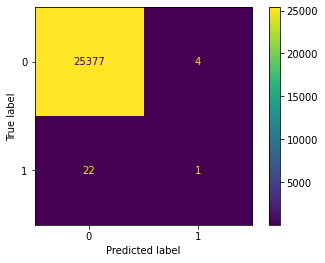

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification
from sklearn.metrics import ConfusionMatrixDisplay
%matplotlib inline

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()



# Curva Roc, faremos:

In [ ]:
from sklearn.metrics import roc_curve


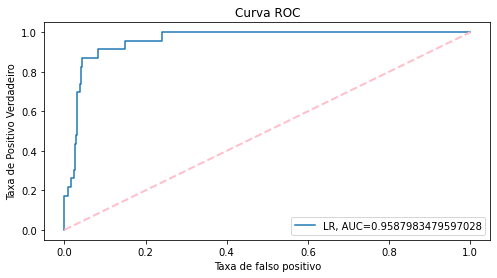

In [ ]:
y_pred_proba = lr.predict_proba(x_test)[::, 1]
fpr, tpr, _= metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.rcParams['figure.figsize'] = (8., 4.)
plt.plot(fpr,tpr,label="LR, AUC="+str(auc))
plt.plot([0, 1], [0, 1], color='pink', lw=2, linestyle='--')
plt.xlabel('Taxa de falso positivo')
plt.ylabel('Taxa de Positivo Verdadeiro')
plt.title('Curva ROC')
   
plt.legend(loc=4)

#BALANCEAMENTO DE DADOS - DUPLICANDO OS DADOS COM oversampling E SMOTE





In [ ]:
pip install -U imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached imbalanced_learn-0.9.1-py3-none-any.whl (199 kB)


In [ ]:
from imblearn.over_sampling import SMOTE
import numpy as np
smote = SMOTE(random_state=42)


In [ ]:
x = df.drop('Fraude', axis=1)
y = df['Fraude']


In [ ]:
x_resampled, y_resampled = smote.fit_resample(x,y)


In [ ]:
df_balanced = pd.concat([y_resampled, x_resampled], axis=1)
df_balanced


,Fraude,Tempo,Valor,Saldo_inicial_co,Novo_saldo_co,Saldo_inicial_cd,Novo_saldo_cd,Tipo_CASH_IN,Tipo_CASH_OUT,Tipo_DEBIT,Tipo_PAYMENT,Tipo_TRANSFER
0,0,1,9839.640000,170136.000000,160296.36,0.000000,0.000000,0,0,0,1,0
1,0,1,1864.280000,21249.000000,19384.72,0.000000,0.000000,0,0,0,1,0
2,1,1,181.000000,181.000000,0.00,0.000000,0.000000,0,0,0,0,1
3,1,1,181.000000,181.000000,0.00,21182.000000,0.000000,0,1,0,0,0
4,0,1,11668.140000,41554.000000,29885.86,0.000000,0.000000,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
202989,1,5,17608.962863,17608.962863,0.00,0.000000,0.000000,0,0,0,0,1
202990,1,7,12116.291013,12116.291013,0.00,0.000000,0.000000,0,0,0,0,1
202991,1,1,231612.880715,231612.880715,0.00,1945.589357,9370.603471,0,0,0,0,0
202992,1,9,547325.144758,547325.144758,0.00,0.000000,0.000000,0,0,0,0,1


In [ ]:
df_balanced.groupby('Fraude').Tempo.count()

Fraude
0    101497
1    101497
Name: Tempo, dtype: int64

# Testando de novo Matriz confusão e a ROC

In [ ]:
x = df_balanced.iloc[:, 1:].values
y = df_balanced.iloc[:, 0].values

from sklearn.model_selection import train_test_split

SEED = 42

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state = SEED)

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

lr = LogisticRegression(max_iter=1000, random_state=SEED)

lr.fit(x_train, y_train)
y_pred =lr.predict(x_test)


print("",metrics.classification_report(y_test, y_pred))

               precision    recall  f1-score   support

           0       0.96      0.92      0.94     25409
           1       0.92      0.96      0.94     25340

    accuracy                           0.94     50749
   macro avg       0.94      0.94      0.94     50749
weighted avg       0.94      0.94      0.94     50749



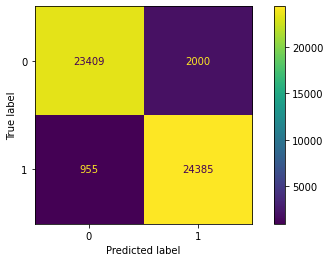

In [ ]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

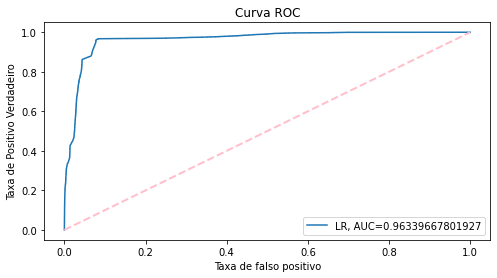

In [ ]:
y_pred_proba = lr.predict_proba(x_test)[::, 1]
fpr, tpr, _= metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.rcParams['figure.figsize'] = (8., 4.)
plt.plot(fpr,tpr,label="LR, AUC="+str(auc))
plt.plot([0, 1], [0, 1], color='pink', lw=2, linestyle='--')
plt.xlabel('Taxa de falso positivo')
plt.ylabel('Taxa de Positivo Verdadeiro')
plt.title('Curva ROC')
   
plt.legend(loc=4)

#Formulando Hipoteses

1 – Fraudes podem ocorrer em horários diferentes das movimentações bancárias habituais feitas pelos clientes.
2 – Ocorrem mais fraudes por meio de transferência do que pagamento.
3– Quando dinheiro é transferido, o tempo que ele permanece na conta do destinatário, pode indicar fraude .


In [ ]:
pandas_profiling.ProfileReport(df_balanced)


#Arvóre de decisão

In [ ]:
from sklearn.tree import DecisionTreeClassifier


In [ ]:
dt =  DecisionTreeClassifier(max_depth = 5, random_state=SEED)


In [ ]:
model = dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)

print("",metrics.classification_report(y_test, y_pred))


               precision    recall  f1-score   support

           0       0.99      0.93      0.96     25409
           1       0.94      0.99      0.96     25340

    accuracy                           0.96     50749
   macro avg       0.96      0.96      0.96     50749
weighted avg       0.96      0.96      0.96     50749



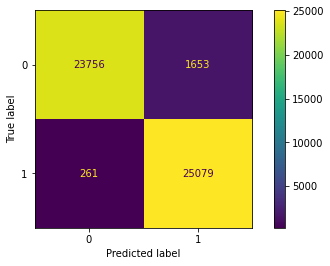

In [ ]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

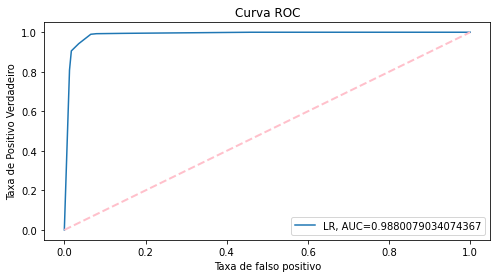

In [ ]:
y_pred_proba = dt.predict_proba(x_test)[::, 1]
fpr, tpr, _= metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.rcParams['figure.figsize'] = (8., 4.)
plt.plot(fpr,tpr,label="LR, AUC="+str(auc))
plt.plot([0, 1], [0, 1], color='pink', lw=2, linestyle='--')
plt.xlabel('Taxa de falso positivo')
plt.ylabel('Taxa de Positivo Verdadeiro')
plt.title('Curva ROC')
   
plt.legend(loc=4)

#Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier


In [ ]:
rf = RandomForestClassifier(max_depth= 5, random_state = SEED)

In [ ]:
model = rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

print("",metrics.classification_report(y_test, y_pred))

               precision    recall  f1-score   support

           0       0.97      0.97      0.97     25409
           1       0.97      0.97      0.97     25340

    accuracy                           0.97     50749
   macro avg       0.97      0.97      0.97     50749
weighted avg       0.97      0.97      0.97     50749



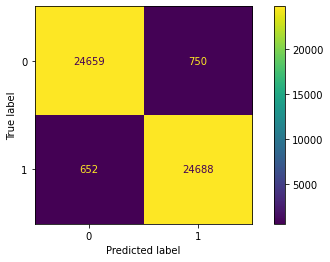

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()


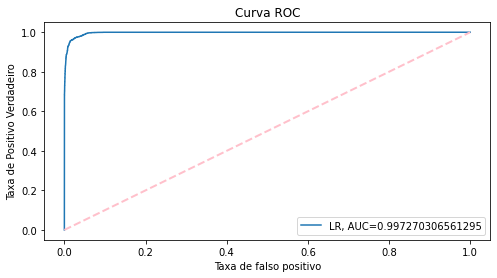

In [ ]:
y_pred_proba = rf.predict_proba(x_test)[::, 1]
fpr, tpr, _= metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.rcParams['figure.figsize'] = (8., 4.)
plt.plot(fpr,tpr,label="LR, AUC="+str(auc))
plt.plot([0, 1], [0, 1], color='pink', lw=2, linestyle='--')
plt.xlabel('Taxa de falso positivo')
plt.ylabel('Taxa de Positivo Verdadeiro')
plt.title('Curva ROC')
   
plt.legend(loc=4)

#MODELOS 

------------------------------
LogisticRegression
****Valor - Resultados****
               precision    recall  f1-score   support

           0       0.96      0.92      0.94     25409
           1       0.92      0.96      0.94     25340

    accuracy                           0.94     50749
   macro avg       0.94      0.94      0.94     50749
weighted avg       0.94      0.94      0.94     50749

------------------------------
DecisionTreeClassifier
****Valor - Resultados****
               precision    recall  f1-score   support

           0       0.99      0.93      0.96     25409
           1       0.94      0.99      0.96     25340

    accuracy                           0.96     50749
   macro avg       0.96      0.96      0.96     50749
weighted avg       0.96      0.96      0.96     50749

------------------------------
RandomForestClassifier
****Valor - Resultados****
               precision    recall  f1-score   support

           0       0.97      0.97      0.97     2

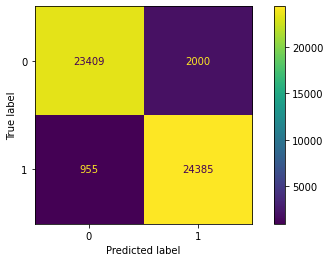

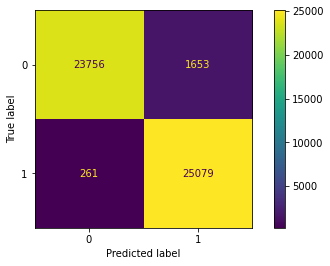

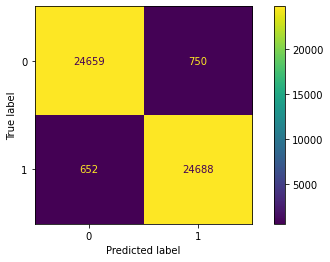

In [ ]:

classifiers = [
    LogisticRegression(max_iter=1000, random_state=SEED),
    DecisionTreeClassifier(max_depth = 5, random_state=SEED),
    RandomForestClassifier(max_depth= 5, random_state = SEED)]
for clf in classifiers:
  clf.fit(x_train, y_train)
  name = clf.__class__.__name__
  print("-"*30)
  print(name)
  print('****Valor - Resultados****')
  y_pred = clf.predict(x_test)
  print("",metrics.classification_report(y_test, y_pred))
  
  cm = confusion_matrix(y_test, y_pred)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm)
  disp.plot()



#Modelo Random Florest

In [ ]:
n_estimators = np.arange(40, 400, step=40)
criterion = ["gini", "entropy"]
max_features = ["auto", "sqrt", "log2"]
max_depth = list(np.arange(4, 20, step=1))
min_samples_split = np.arange(4, 20, step=2)
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]


In [ ]:
param_grid = {
    "n_estimators": n_estimators,
    "criterion": criterion,
    "max_features": max_features,
    "max_depth": max_depth,
    "min_samples_split": min_samples_split,
    "min_samples_leaf": min_samples_leaf,
    "bootstrap": bootstrap,
}


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

SEED = 70

rforest = RandomForestClassifier(random_state=SEED)

In [ ]:
random_cv = RandomizedSearchCV(
    rforest, param_grid, n_iter=5, cv=3, scoring="recall", n_jobs=-1, random_state = SEED
)

In [ ]:
%%time
rcv = random_cv.fit(x, y)

CPU times: user 1min 25s, sys: 534 ms, total: 1min 25s
Wall time: 7min 30s


In [ ]:
pd.DataFrame(rcv.cv_results_)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_criterion,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,21.115140,1.105630,0.417226,0.076323,40,16,2,log2,8,gini,False,"{'n_estimators': 40, 'min_samples_split': 16, ...",0.985132,0.999882,0.993379,0.992798,0.006035,3
1,11.254266,4.125855,0.283767,0.020191,40,8,1,sqrt,5,gini,False,"{'n_estimators': 40, 'min_samples_split': 8, '...",0.966984,0.995921,0.973900,0.978935,0.012338,5
2,72.339990,5.723926,1.779545,0.089963,240,18,4,log2,11,gini,False,"{'n_estimators': 240, 'min_samples_split': 18,...",0.997872,0.999793,0.995271,0.997645,0.001853,1
3,71.882597,0.695551,2.451790,0.463000,360,10,4,auto,5,gini,False,"{'n_estimators': 360, 'min_samples_split': 10,...",0.968876,0.995980,0.972511,0.979122,0.012012,4
4,52.320406,6.206702,1.396373,0.084944,200,12,2,sqrt,11,entropy,True,"{'n_estimators': 200, 'min_samples_split': 12,...",0.997694,0.999557,0.994266,0.997172,0.002191,2


In [ ]:
rcv.best_params_

{'n_estimators': 240,
 'min_samples_split': 18,
 'min_samples_leaf': 4,
 'max_features': 'log2',
 'max_depth': 11,
 'criterion': 'gini',
 'bootstrap': False}

In [ ]:
rfn = RandomForestClassifier(**rcv.best_params_, random_state = SEED)

model = rfn.fit(x_train, y_train)
y_pred = rfn.predict(x_test)


In [ ]:
print("",metrics.classification_report(y_test, y_pred))

               precision    recall  f1-score   support

           0       1.00      0.99      1.00     25409
           1       0.99      1.00      1.00     25340

    accuracy                           1.00     50749
   macro avg       1.00      1.00      1.00     50749
weighted avg       1.00      1.00      1.00     50749



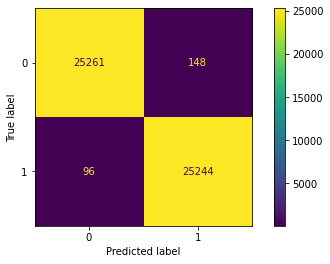

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()